# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

**Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type.** This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. **Or you could build a model that predicts whether or not someone will respond to an offer.** Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).


## Dataset overview
The program used to create the data simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.
Each person in the simulation has some hidden traits that influence their purchasing patterns and are associated with their observable traits. People produce various events, including receiving offers, opening offers, and making purchases.
As a simplification, there are no explicit products to track. Only the amounts of each transaction or offer are recorded.
There are three types of offers that can be sent: buy-one-get-one (BOGO), discount, and informational. In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels.
The basic task is to use the data to identify which groups of people are most responsive to each type of offer, and how best to present each type of offer.

## Data Dictionary
#### profile.json
Rewards program users (17000 users x 5 fields)
* gender: (categorical) M, F, O, or null
* age: (numeric) missing value encoded as 118
* id: (string/hash)
* became_member_on: (date) format YYYYMMDD
* income: (numeric)

#### portfolio.json
Offers sent during 30-day test period (10 offers x 6 fields)
* reward: (numeric) money awarded for the amount spent
* channels: (list) web, email, mobile, social
* difficulty: (numeric) money required to be spent to receive reward
* duration: (numeric) time for offer to be open, in days
* offer_type: (string) bogo, discount, informational
* id: (string/hash)

#### transcript.json
Event log (306648 events x 4 fields)
* person: (string/hash)
* event: (string) offer received, offer viewed, transaction, offer completed
* value: (dictionary) different values depending on event type
* offer id: (string/hash) not associated with any "transaction"
* amount: (numeric) money spent in "transaction"
* reward: (numeric) money gained from "offer completed"
* time: (numeric) hours after start of test


In [2]:
# imports
import pandas as pd

In [3]:
# read in the json files
portfolio_df = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile_df = pd.read_json('data/profile.json', orient='records', lines=True)
transcript_df = pd.read_json('data/transcript.json', orient='records', lines=True)

### Cleaning Portfolio

In [4]:
portfolio_df

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [5]:
enumeratedOfferIDs = list(enumerate(set(portfolio_df.id.unique())))

offer_id_map = []
for tupleData in enumeratedOfferIDs:
    tupleData = tupleData[::-1]
    offer_id_map.append(tupleData)
    
offer_id_map = dict(offer_id_map)
portfolio_df['offer_id_new'] = portfolio_df.id.apply(lambda offerId : offer_id_map[offerId])

portfolio_cleaned = portfolio_df[['offer_id_new','offer_type','channels','duration','difficulty','reward']].sort_values(by=['offer_id_new'])
portfolio_cleaned.reset_index(inplace = True)
portfolio_cleaned.drop(['index'], axis =1)

,offer_id_new,offer_type,channels,duration,difficulty,reward
0,0,discount,"[web, email, mobile]",7,10,2
1,1,informational,"[web, email, mobile]",4,0,0
2,2,bogo,"[web, email, mobile, social]",5,5,5
3,3,discount,"[web, email]",10,20,5
4,4,bogo,"[web, email, mobile]",7,5,5
5,5,discount,"[web, email, mobile, social]",7,7,3
6,6,bogo,"[web, email, mobile, social]",5,10,10
7,7,bogo,"[email, mobile, social]",7,10,10
8,8,informational,"[email, mobile, social]",3,0,0
9,9,discount,"[web, email, mobile, social]",10,10,2


### Cleaning Transaction DF

In [6]:
# print(transcript_df.head())

transcript_df['valuekey'] = transcript_df['value'].apply(lambda rowData : list(rowData.keys())[0])

In [7]:
transcript_df.groupby(['event','valuekey']).count()

,,person,time,value
event,valuekey,,,
offer completed,offer_id,33579,33579,33579
offer received,offer id,76277,76277,76277
offer viewed,offer id,57725,57725,57725
transaction,amount,138953,138953,138953


In [8]:
transcript_df.loc[transcript_df.event != 'transaction','offerID'] = transcript_df['value'].apply(lambda rowData : rowData[list(rowData.keys())[0]])
transcript_df.loc[transcript_df.event == 'transaction','transactionAmount'] = transcript_df['value'].apply(lambda rowData : rowData[list(rowData.keys())[0]])

In [9]:
transcript_df.transactionAmount.fillna(0, inplace = True)
transcript_df.offerID.fillna('Not Applicable', inplace = True)
transcript_df.drop(['valuekey'], axis = 1, inplace=True)
transcript_df.head()

,event,person,time,value,offerID,transactionAmount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


In [10]:
transcript_df.groupby(['person'])['person'].count().sort_values(ascending = False)

person
94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
d0a80415b84c4df4908b8403b19765e3    48
5e60c6aa3b834e44b822ea43a3efea26    48
a42ed50acc4d4b25bca647c9e0b916ad    46
b1f4ece7d49342628a9ed77aee2cde58    46
28681c16026943e68f26feaccab0907f    46
bd2cdd691aca4bb0a0e039979ee5de5c    46
ab25fd6fbd5040f880751921e4029757    44
9ae56116908640fc83477982da0aaec4    43
4142f5e23db741b1af4be0287dc91c1c    43
ca265792e65949d79b2b0e91bdd31c57    43
d087fd0166404163b7d1e1e7cf2a9ac7    43
86e9d338b85b4177b369fe6b0ad4fed3    43
0d74b166a5e54b269795dbaf38c6dfae    42
edc7b04392144da9979f3077095f268a    42
8e7d398d4bd948e397e201ad2bd5cce8    42
cd9bac9e8aea4609929a55b9b468c88e    42
0ebc3c4c39234ab6a2701fe2525705a9    42
40ce078d5b2a43d19138a788754520be    42
f0a3a3c05e3c4e2e84929a49a6b5488c    41
2ddc7d63c32d4606a7a45e3e70439b44    41
417c8e42cba54dd0ba1ea7ee079ef87a    41
a6fce370a2ce4df995fc4899bfeb3b6a    41
81a263ee0b8544b6a8

In [11]:
enumeratedPersonIDs = list(enumerate(set(transcript_df.person.unique())))

In [12]:
person_id_map = []
for tupleData in enumeratedPersonIDs:
    tupleData = tupleData[::-1]
    person_id_map.append(tupleData)
    
person_id_map = dict(person_id_map)
transcript_df['personID'] = transcript_df.person.apply(lambda personId : person_id_map[personId])

In [13]:
transcript_cleaned = transcript_df[['personID', 'event', 'value', 'offerID', 'transactionAmount', 'time']].sort_values(by=['personID'])
transcript_cleaned = transcript_cleaned.reset_index()
transcript_cleaned.drop(['index'], axis = 1, inplace = True)
transcript_cleaned['offer_id_new'] = transcript_cleaned[transcript_cleaned.offerID != 'Not Applicable']['offerID'].apply(lambda offerId : str(offer_id_map[offerId]))

In [14]:
transcript_cleaned.head()

,personID,event,value,offerID,transactionAmount,time,offer_id_new
0,0,transaction,{'amount': 6.1},Not Applicable,6.10,504,NaN
1,0,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,0.00,336,2
2,0,transaction,{'amount': 3.64},Not Applicable,3.64,576,NaN
3,0,transaction,{'amount': 13.86},Not Applicable,13.86,480,NaN
4,0,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},ae264e3637204a6fb9bb56bc8210ddfd,0.00,12,7


In [106]:
# getting highest offers viewed
total_offers_viewed = transcript_cleaned[transcript_cleaned.event == 'offer viewed'].event.count()
offers_veiwed_df = pd.DataFrame(transcript_cleaned[transcript_cleaned.event == 'offer viewed'].groupby(['offer_id_new']).offer_id_new.count())
offers_veiwed_df = 

In [15]:
offer_completed_count = transcript_cleaned[transcript_cleaned.event == 'offer completed'].groupby(['offer_id_new']).event.count()
offer_viewed_count = transcript_cleaned[transcript_cleaned.event == 'offer viewed'].groupby(['offer_id_new']).event.count()
offer_received_count = transcript_cleaned[transcript_cleaned.event == 'offer received'].groupby(['offer_id_new']).event.count()

In [16]:
offer_counts = pd.concat([offer_received_count,offer_viewed_count,offer_completed_count], axis =1)
offer_counts.columns = ['received','viewed', 'completed']
offer_counts.fillna(0)

offer_counts['view_percentage'] = offer_counts.apply(lambda row: ((row['viewed']/row['received'])*100), axis = 1)
offer_counts.sort_values(by=['view_percentage'],ascending=False)

F:\InstalledPrograms\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,received,viewed,completed,view_percentage
9,7597,7327,5317.0,96.445966
6,7593,7298,3331.0,96.114843
5,7646,7337,5156.0,95.958671
2,7571,7264,4296.0,95.945053
8,7618,6687,NaN,87.778945
7,7658,6716,3688.0,87.699138
1,7617,4144,NaN,54.404621
4,7677,4171,4354.0,54.331119
0,7632,4118,4017.0,53.957023
3,7668,2663,3420.0,34.728743


## Observing the demographics

In [24]:
profile_df['person_id'] = profile_df.id.apply(lambda x: person_id_map[x])
profile_df.head()

,age,became_member_on,gender,id,income,person_id
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,9906
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,16328
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,1216
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,10944
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,13361


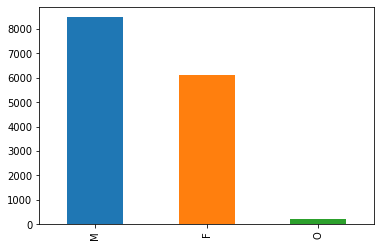

In [38]:
# profile_df.groupby(['gender']).person_id.count()
profile_df.gender.value_counts().plot(kind = 'bar')

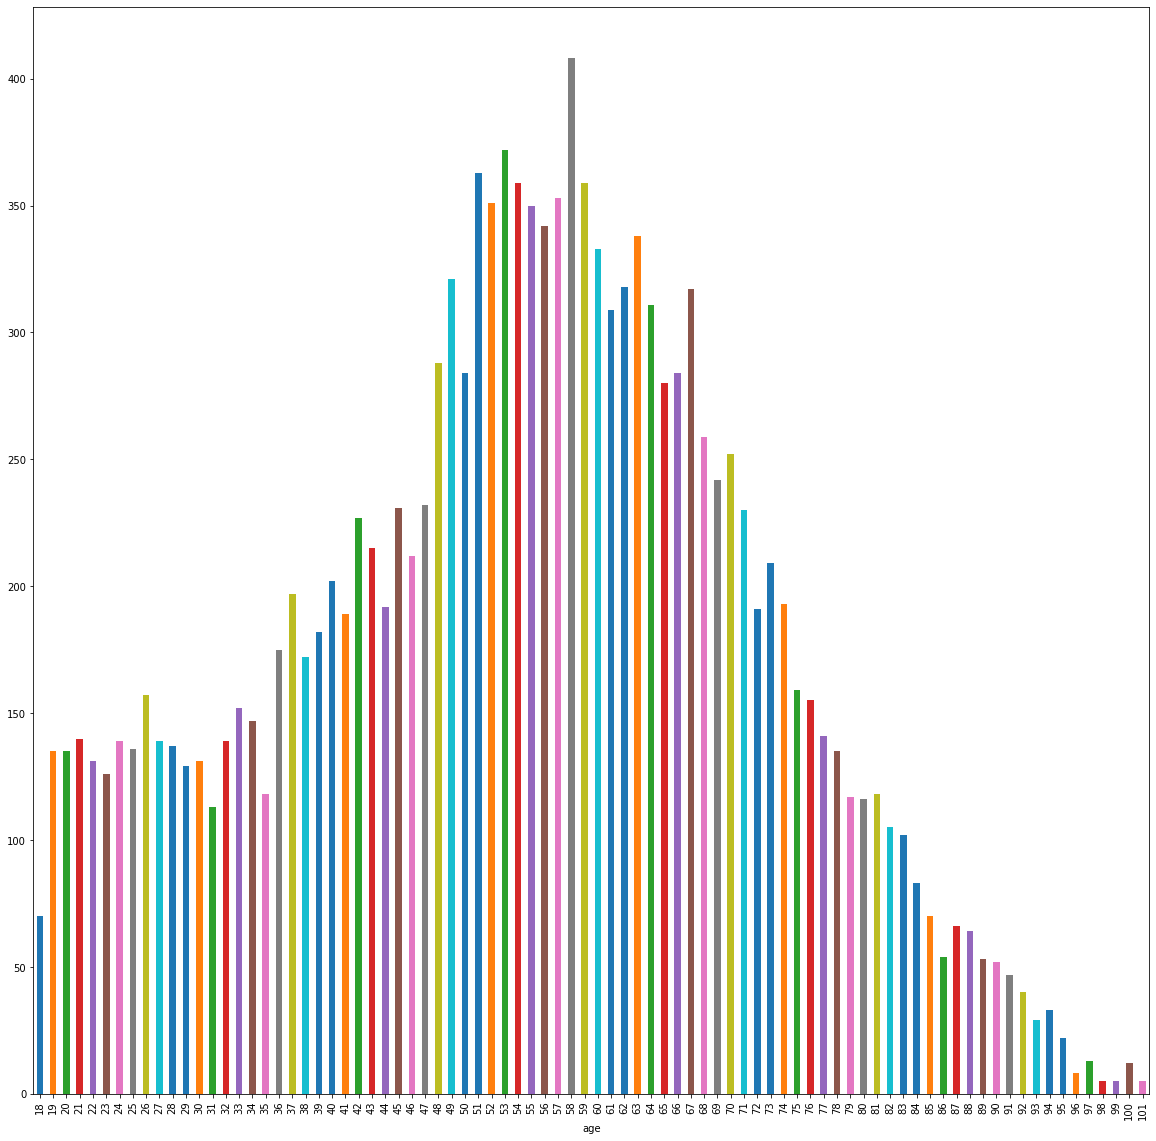

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
profile_df[profile_df.age != 118].groupby(['age']).person_id.count().plot(kind = 'bar')
# profile_df.age.value_counts().plot(kind = 'bar')

In [59]:
#Age by decade
profile_df.index = ['age']
profile_df.drop(118, axis = 0)

# int(22/10)*10

ValueError: Length mismatch: Expected axis has 17000 elements, new values have 1 elements